In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_confirmed = "time_series_covid19_confirmed_global.csv"
covid_recovered = "time_series_covid19_recovered_global.csv"
covid_death = "time_series_covid19_deaths_global.csv"

covid_confirmed_dataset = pd.read_csv(covid_confirmed)
covid_recovered_dataset = pd.read_csv(covid_recovered)
covid_death_dataset = pd.read_csv(covid_death)

In [3]:
covid_confirmed_dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,5
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [4]:
total_cases = covid_confirmed_dataset.iloc[:,4:].sum(axis = 0, skipna = True).astype(int).reset_index()
total_cases = total_cases.rename(columns={0 :'cases', 'index': 'dates'})
dates = total_cases['dates']
print(total_cases)

      dates    cases
0   1/22/20      555
1   1/23/20      654
2   1/24/20      941
3   1/25/20     1434
4   1/26/20     2118
..      ...      ...
88  4/19/20  2400078
89  4/20/20  2471247
90  4/21/20  2548091
91  4/22/20  2623049
92  4/23/20  2707728

[93 rows x 2 columns]


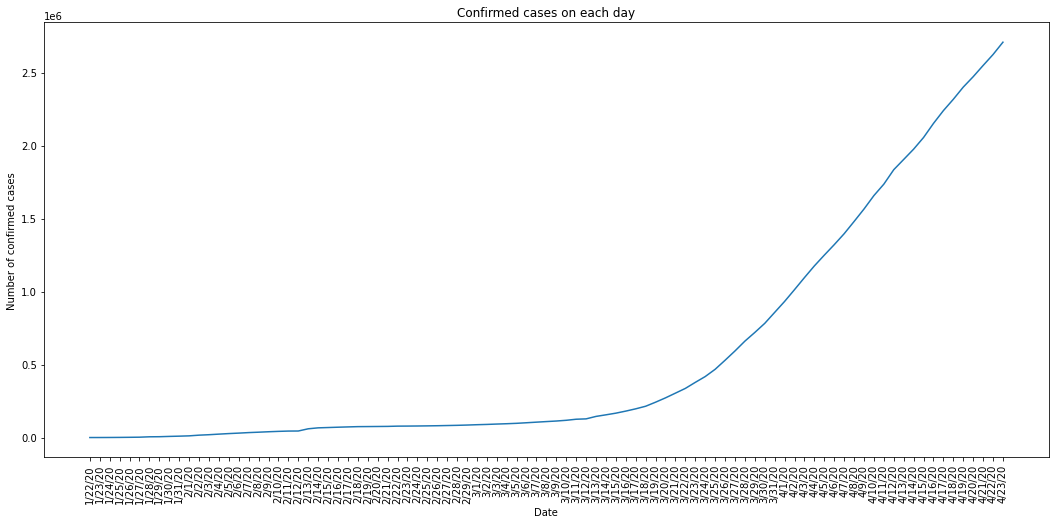

In [5]:
plt.figure(figsize = (18,8))
plt.plot(total_cases['dates'],total_cases['cases'])
plt.ylabel("Number of confirmed cases")
plt.xlabel("Date")
plt.title("Confirmed cases on each day")
plt.xticks(rotation= 90)
plt.show()

In [6]:
total_cases_per_week = total_cases.copy()
week_cases = list(range(6,len(total_cases_per_week['dates'].tolist()),7))
week_cases.append(len(total_cases_per_week['dates'].tolist())-1)
week = list(range(len(week_cases)))
total_cases_per_week = total_cases_per_week.iloc[week_cases]
total_cases_per_week["week_no"] = week
total_cases_per_week = total_cases_per_week.rename(columns={'cases' :'total cases'})
total_cases_per_week = total_cases_per_week[['dates','week_no','total cases']]
print(total_cases_per_week)

      dates  week_no  total cases
6   1/28/20        0         5578
13   2/4/20        1        23892
20  2/11/20        2        44802
27  2/18/20        3        75136
34  2/25/20        4        80406
41   3/3/20        5        92840
48  3/10/20        6       118620
55  3/17/20        7       197102
62  3/24/20        8       418041
69  3/31/20        9       857487
76   4/7/20       10      1396092
83  4/14/20       11      1975195
90  4/21/20       12      2548091
92  4/23/20       13      2707728


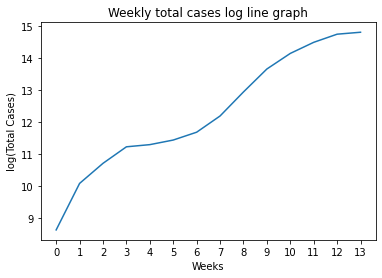

In [7]:
plt.plot(total_cases_per_week['week_no'],np.log(total_cases_per_week['total cases']))
plt.xlabel("Weeks")
plt.ylabel("log(Total Cases)")
plt.title("Weekly total cases log line graph")
plt.xticks(list(range(len(week))))
plt.show()

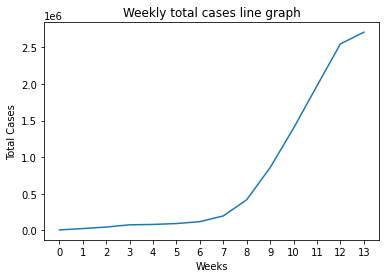

In [8]:
plt.plot(total_cases_per_week['week_no'],total_cases_per_week['total cases'])
plt.xlabel("Weeks")
plt.ylabel("Total Cases")
plt.title("Weekly total cases line graph")
plt.xticks(list(range(len(week))))
plt.show()

In [9]:
per_week_new_cases = total_cases_per_week.copy()
first_week = per_week_new_cases["total cases"].tolist()[0]
per_week_new_cases["new cases"] = first_week
per_week_new_cases["new cases"][1:] = list(map(lambda i: per_week_new_cases["total cases"].tolist()[i] - per_week_new_cases["total cases"].tolist()[i-1],range(1,len(per_week_new_cases))))
per_week_new_cases = per_week_new_cases[["week_no","total cases","new cases"]]
print(per_week_new_cases)

    week_no  total cases  new cases
6         0         5578       5578
13        1        23892      18314
20        2        44802      20910
27        3        75136      30334
34        4        80406       5270
41        5        92840      12434
48        6       118620      25780
55        7       197102      78482
62        8       418041     220939
69        9       857487     439446
76       10      1396092     538605
83       11      1975195     579103
90       12      2548091     572896
92       13      2707728     159637


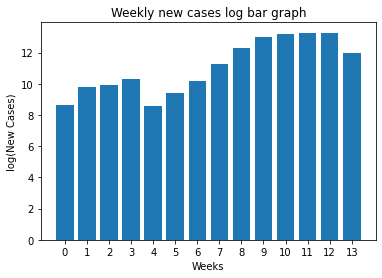

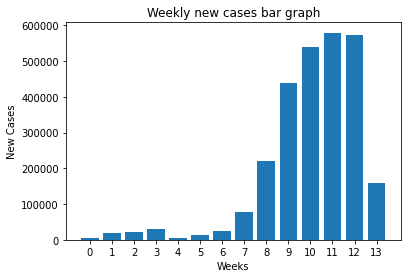

In [10]:
plt.bar(per_week_new_cases['week_no'],np.log(per_week_new_cases['new cases']))
plt.xlabel("Weeks")
plt.ylabel("log(New Cases)")
plt.title("Weekly new cases log bar graph")
plt.xticks(list(range(0,len(week))))
plt.show()
plt.bar(per_week_new_cases['week_no'],per_week_new_cases['new cases'])
plt.xlabel("Weeks")
plt.ylabel("New Cases")
plt.title("Weekly new cases bar graph")
plt.xticks(list(range(0,len(week))))
plt.show()

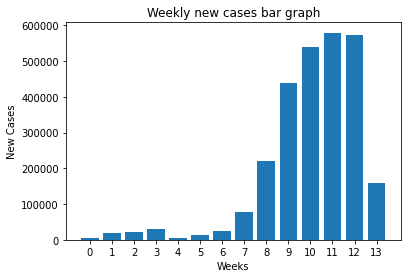

In [11]:
plt.bar(per_week_new_cases['week_no'],per_week_new_cases['new cases'])
plt.xlabel("Weeks")
plt.ylabel("New Cases")
plt.title("Weekly new cases bar graph")
plt.xticks(list(range(0,len(week))))
plt.show()

In [12]:
print(covid_death_dataset.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \
0        0        0        0  ...       23       25       30       30   
1        0        0        0  ...       24       25       26       26   
2        0        0        0  ...      326      336      348      364   
3        0        0        0  ...       31       33       33       35   
4        0        0        0  ...        2        2        2        2   

   4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  
0       30       33   

In [13]:
deaths = covid_death_dataset.iloc[:,4:].sum(axis = 0, skipna = True).astype(int).reset_index()
deaths = deaths.rename(columns={0 :'total deaths','index':'dates'})
deaths = deaths.iloc[week_cases]
deaths["week_no"] = week.copy()
deaths = deaths[['week_no','total deaths']]
deaths["new deaths"] = deaths["total deaths"].tolist()[0]
deaths["new deaths"][1:] = list(map(lambda i: deaths["total deaths"].tolist()[i] - deaths["total deaths"].tolist()[i-1],range(1,len(deaths))))
print(deaths)

    week_no  total deaths  new deaths
6         0           131         131
13        1           492         361
20        2          1113         621
27        3          2007         894
34        4          2708         701
41        5          3160         452
48        6          4262        1102
55        7          7905        3643
62        8         18625       10720
69        9         42108       23483
76       10         81937       39829
83       11        125995       44058
90       12        176582       50587
92       13        190857       14275


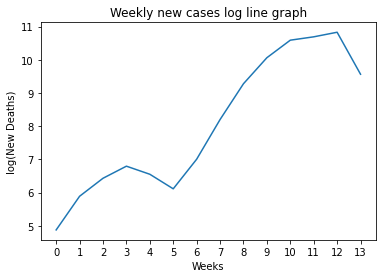

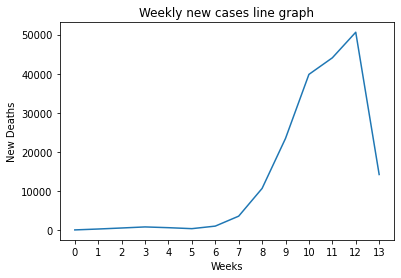

In [14]:
plt.plot(deaths['week_no'],np.log(deaths['new deaths']))
plt.xlabel("Weeks")
plt.ylabel("log(New Deaths)")
plt.xticks(list(range(0,len(week),1)))
plt.title("Weekly new cases log line graph")
plt.show()
plt.plot(deaths['week_no'],deaths['new deaths'])
plt.xlabel("Weeks")
plt.ylabel("New Deaths")
plt.xticks(list(range(0,len(week),1)))
plt.title("Weekly new cases line graph")
plt.show()

In [15]:
country = covid_confirmed_dataset.copy()
country["Total Cases"] = covid_confirmed_dataset[dates.tolist()[-1]]
top_country = country[['Country/Region','Total Cases']]
top_country = top_country.groupby('Country/Region').sum().sort_values(by = 'Total Cases', ascending = False).reset_index()
top_10_confirmed = top_country.head(10)
top_10_confirmed = top_10_confirmed.sort_values(by='Country/Region')
print(top_country.head(10))

   Country/Region  Total Cases
0              US       869170
1           Spain       213024
2           Italy       189973
3          France       158303
4         Germany       153129
5  United Kingdom       139246
6          Turkey       101790
7            Iran        87026
8           China        83884
9          Russia        62773


In [16]:
top_10_country_date_wise = country.sort_values(['Total Cases'], ascending=False)
top_10_country_date_wise = top_10_country_date_wise.groupby('Country/Region').sum()
top_10_country_date_wise = top_10_country_date_wise.sort_values(by = 'Total Cases', ascending = False)
top_10_country_date_wise = top_10_country_date_wise.drop(columns = ["Lat","Long","Total Cases"])
top_10_country_date_wise = top_10_country_date_wise.iloc[:,week_cases]
top_10_country_date_wise.columns = week
top_10_country_date_wise = top_10_country_date_wise.T
for each_country in top_10_country_date_wise:
    top_10_country_date_wise[each_country][1:] = list(map(lambda i: top_10_country_date_wise[each_country].tolist()[i] - top_10_country_date_wise[each_country].tolist()[i-1],range(1,len(top_10_country_date_wise))))
top_10_country_date_wise = top_10_country_date_wise.T
print(top_10_country_date_wise.head(10))

                  0      1      2      3     4     5     6      7      8   \
Country/Region                                                              
US                 5      6      1      1    38    67   841   5462  47315   
Spain              0      1      1      0     4   159  1530  10053  28137   
Italy              0      2      1      0   319  2180  7647  21357  37670   
France             4      2      5      1     2   190  1590   5921  14907   
Germany            4      8      4      0     1   179  1261   7800  23729   
United Kingdom     0      2      6      1     4    38   333   1576   6204   
Turkey             0      0      0      0     0     0     0     47   1825   
Iran               0      0      0      0    95  2241  5706   8127   8642   
China           5509  18198  20679  29825  3543  2507   626    171    533   
Russia             0      2      0      0     0     1    17     94    381   

                    9       10      11      12     13  
Country/Region     

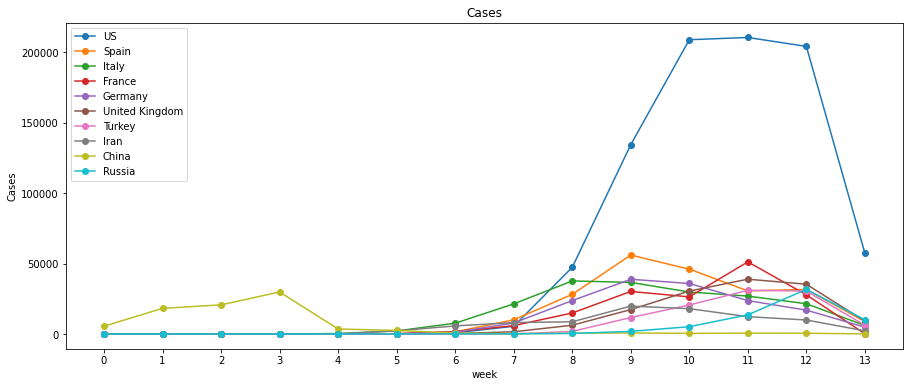

In [17]:
plt.figure(figsize = (15,6))
for data in range(10):
    plt.plot(top_10_country_date_wise.iloc[data].T, 'o-',label = top_country["Country/Region"].iloc[data])
plt.title("Cases")
plt.xlabel("week")
plt.ylabel("Cases")
plt.xticks(range(0,len(week),1))
plt.legend(loc = 'upper left')
plt.show()

In [18]:
covid_recovered_dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,43,54,99,112,131,135,150,166,179
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,248,251,277,283,302,314,327,345,356,385
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,691,708,783,846,894,1047,1099,1152,1204,1355
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,128,169,169,191,205,235,248,282,309,333
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
covid_recovered_dataset["Total recovered"] = covid_recovered_dataset[dates.tolist()[-1]]
top_recovered_country = covid_recovered_dataset[covid_recovered_dataset['Country/Region'].str.contains('|'.join(list(top_country['Country/Region'].head(10))))][['Country/Region','Total recovered']]
top_recovered_country = top_recovered_country.groupby('Country/Region').sum().sort_values(by = 'Country/Region').reset_index()
top_recovered_country["Total Cases"] = top_10_confirmed["Total Cases"]
top_recovered_country = top_recovered_country.sort_values(by = 'Total recovered', ascending = False)
top_recovered_country

,Country/Region,Total recovered,Total Cases
2,Germany,103300,189973
6,Spain,89250,101790
8,US,80203,83884
0,China,77983,869170
3,Iran,64843,158303
4,Italy,57576,153129
1,France,42762,213024
7,Turkey,18491,87026
5,Russia,4891,139246
9,United Kingdom,712,62773


In [20]:
top_10_country_date_wise_recovered =  covid_recovered_dataset[covid_recovered_dataset['Country/Region'].str.contains('|'.join(list(top_country['Country/Region'].head(10))))]
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.sort_values(['Total recovered'], ascending=False)
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.groupby('Country/Region').sum()
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.sort_values(by = 'Total recovered', ascending = False)
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.drop(columns = ["Lat","Long","Total recovered"])
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.iloc[:,week_cases]
top_10_country_date_wise_recovered.columns = week
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.T
for each_country in top_10_country_date_wise_recovered:
    top_10_country_date_wise_recovered[each_country][1:] = list(map(lambda i: top_10_country_date_wise_recovered[each_country].tolist()[i] - top_10_country_date_wise_recovered[each_country].tolist()[i-1],range(1,len(top_10_country_date_wise_recovered))))
top_10_country_date_wise_recovered = top_10_country_date_wise_recovered.T
print(top_10_country_date_wise_recovered)

                 0    1     2     3      4      5      6     7     8      9   \
Country/Region                                                                 
Germany           0    0     0    12      2      2      2    49  3176  12857   
Spain             0    0     0     2      0      0     30   996  2766  15465   
US                0    0     3     0      3      1      1     9   331   6676   
China           101  742  3793  9570  13470  19774  12731  8617  4482   2926   
Iran              0    0     0     0      0    291   2440  2658  3524   5743   
Italy             0    0     0     0      1    159    564  2217  5385   7403   
France            0    0     0     4      7      1      0     0  3238   6263   
Turkey            0    0     0     0      0      0      0     0     0    243   
Russia            0    0     0     2      0      0      1     5    14     99   
United Kingdom    0    0     0     8      0      0     11    34    87     39   

                   10     11     12    

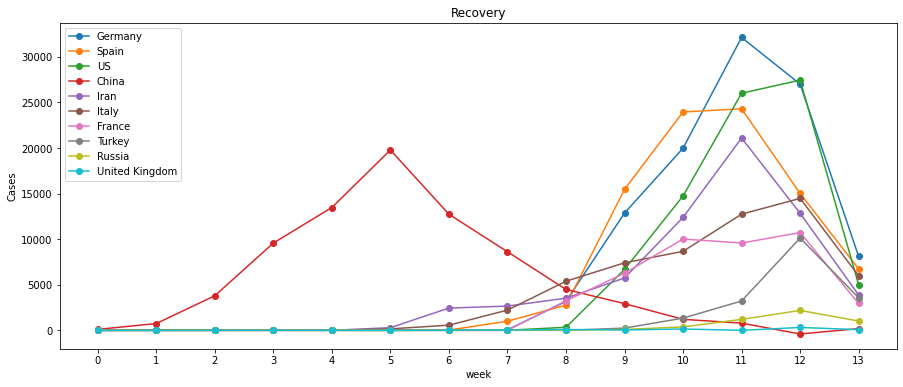

In [21]:
plt.figure(figsize = (15,6))
for data in range(10):
    plt.plot(top_10_country_date_wise_recovered.iloc[data].T,'o-' ,label = top_recovered_country["Country/Region"].iloc[data])
plt.title("Recovery")
plt.xlabel("week")
plt.ylabel("Cases")
plt.xticks(range(0,len(week),1))
plt.legend(loc = 'upper left')
plt.show()